# Errors

In [24]:
import sys

# Open a file in write mode to store the error output
with open('error_log.txt', 'w') as error_file:
    # Redirect standard error (stderr) to the file
    sys.stderr = error_file

    # Rest of your code goes here

    # Revert the stderr redirection (optional)
    sys.stderr = sys.__stderr__

# Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# %matplotlib inline

# Creating & Inspecting Dataset

In [26]:
admit = pd.read_csv('admittance.csv')

In [27]:
admit.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [28]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [29]:
admit.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SAT,168.0,1695.27,183.02,1334.0,1547.5,1691.5,1844.5,2050.0


# Splitting & Preprocessing Data

In [30]:
admit['Admitted'] = pd.get_dummies(admit['Admitted'], drop_first=True).rename(columns={'Yes':'Admitted'})

In [31]:
admit

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
admit['SAT'] = StandardScaler().fit_transform(admit[['SAT']]).round(2)

In [34]:
admit

,SAT,Admitted
0,-1.82,0
1,0.53,1
2,1.42,1
3,-0.23,0
4,-0.56,0
...,...,...
163,0.15,1
164,0.30,1
165,-0.77,0
166,-0.94,0


In [35]:
X = admit[['SAT']]
y = admit['Admitted']

In [36]:
X

,SAT
0,-1.82
1,0.53
2,1.42
3,-0.23
4,-0.56
...,...
163,0.15
164,0.30
165,-0.77
166,-0.94


In [37]:
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: uint8

# Data Exploration

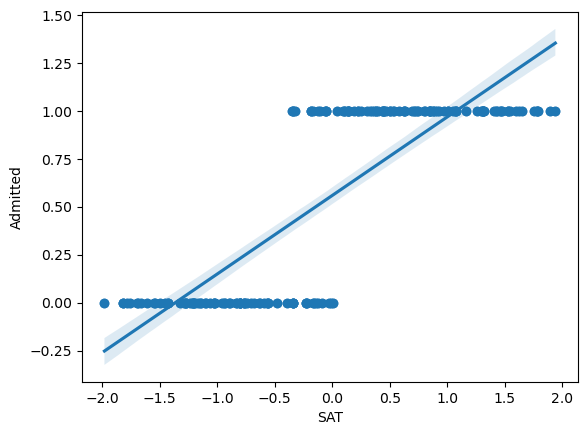

In [38]:
sns.regplot(data=admit,x=X,y=y)
plt.scatter(X,y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

# Model Training & Predicting 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X,y)

LogisticRegression()

In [42]:
model.coef_

array([[3.86141574]])

In [43]:
model.intercept_

array([0.72285595])

# Predicting New Instance

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
model.predict(StandardScaler().fit_transform([[1650]]))

array([1], dtype=uint8)

# Plotting Logistic Model

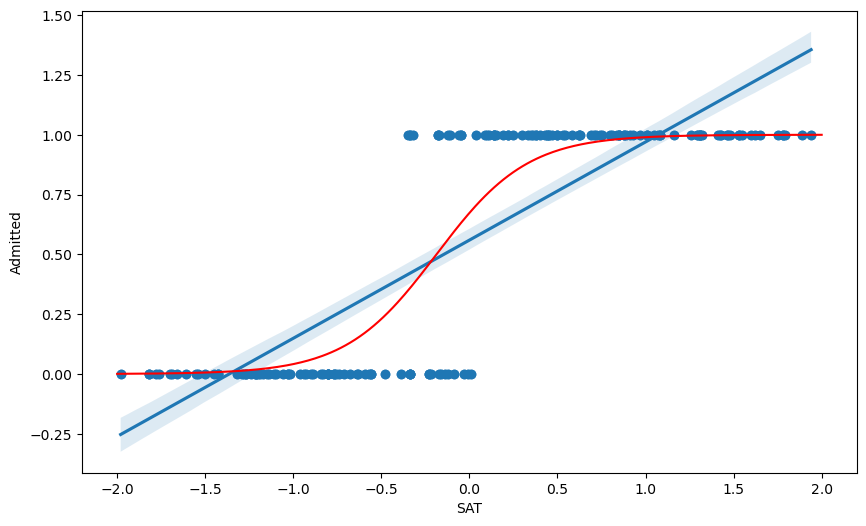

In [46]:
plt.figure(figsize=(10, 6))
sns.regplot(data=admit,x=X,y=y)
plt.scatter(X, y)
X_test = np.linspace(-2, 2, 300)
from scipy.special import expit
loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color="red")

# THANK YOU